First of all we are going to download the data

In [6]:
import pandas as pd

data = pd.read_csv(r'C:\Users\crist\mentoring\comptes des communes\data\raw\base_communes.csv', sep=";", encoding="utf-8")

C:\Users\crist\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,14,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data.head()

The dimensions of our dataframe:

In [2]:
data.shape

(18120499, 42)

We are going to start an analysis without any previous knowlegde of the subject. 
Thus, the first thing we will do will be to look for the general information of our database. 
If necesary, we will search the fields in the internet, trying to have some extra help.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18120499 entries, 0 to 18120498
Data columns (total 42 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   exer                                   int64  
 1   outre_mer                              object 
 2   reg_code                               float64
 3   reg_name                               object 
 4   dep_code                               object 
 5   dep_name                               object 
 6   epci_code                              float64
 7   epci_name                              object 
 8   tranche_population                     float64
 9   rural                                  object 
 10  montagne                               object 
 11  touristique                            object 
 12  tranche_revenu_imposable_par_habitant  float64
 13  qpv                                    object 
 14  com_code                               object 
 

In [34]:
data.describe()

,exer,tranche_population,tranche_revenu_imposable_par_habitant,siren,ident,montant,ptot,euros_par_habitant,presence_budget,cbudg,agregat_niveau
count,1.812050e+07,1.810849e+07,1.810849e+07,1.812050e+07,1.812050e+07,1.812050e+07,1.810817e+07,1.810660e+07,18108491.0,1.812050e+07,1.812050e+07
mean,2.014929e+03,2.922191e+00,1.328479e+00,2.144496e+08,2.144496e+13,4.051122e+05,3.568466e+03,1.815727e+02,1.0,1.860787e+00,2.588223e+00
std,2.213752e+00,1.783196e+00,7.049265e-01,2.993979e+06,2.993979e+11,1.132366e+07,4.357441e+04,5.365039e+02,0.0,9.902625e-01,1.675742e+00
min,2.012000e+03,0.000000e+00,0.000000e+00,2.000022e+08,2.000022e+13,-9.435051e+08,0.000000e+00,-4.169737e+04,1.0,1.000000e+00,0.000000e+00
25%,2.013000e+03,2.000000e+00,1.000000e+00,2.124034e+08,2.124034e+13,0.000000e+00,2.570000e+02,0.000000e+00,1.0,1.000000e+00,1.000000e+00
50%,2.015000e+03,3.000000e+00,1.000000e+00,2.146015e+08,2.146015e+13,1.528010e+04,6.180000e+02,2.854750e+01,1.0,1.000000e+00,3.000000e+00
75%,2.017000e+03,3.000000e+00,2.000000e+00,2.167032e+08,2.167032e+13,1.045579e+05,1.636000e+03,1.782688e+02,1.0,3.000000e+00,4.000000e+00
max,2.020000e+03,1.000000e+01,5.000000e+00,2.197402e+08,2.197402e+13,6.845968e+09,2.274880e+06,1.827898e+05,1.0,3.000000e+00,6.000000e+00


### DEFINITIONS

- epci: Établisements publics de coopération intercommunale
- qpv: Quartier de la politique de la ville.
La politique de la ville est une politique de cohésion urbaine et de solidarité envers les quartiers les plus défavorisés. Elle vise à restaurer l'égalité républicaine et à améliorer les conditions de vie des habitants en mobilisant toutes les politiques publiques.
- Tranche population: répartition de la population par age. 11 tranches.
- tranche_revenu_imposable_par_habitant: tranche correspondant à des taux d'imposition (Il y en a 5)
- Siren: système informatique pour le répertoire des entreprises et des établissements (unique identifier)
- insee: Le code INSEE (Institute for Statistics)
- ident ??? quelque sort d'identifiant mais pas connu. Il y en a 84952 différents
- lbudg: localitation budget??
- nomen: Nomenclatures comptables (números de cuentas)
- agregat: grandeur synthétique mesurant le résultat de l'activité économique.Le principal agrégat est le PIB. Macrodatos
- ptot: Poblation total
- presence_budget: Il n'y a que la valeur 1. À éliminer?
- cbudg ?? Il n'y a que les valeurs 1 et 3
- agregat: Agregat description
- agregat niveau: Il y en a 7 niveau

In [37]:
data['presence_budget'].unique()

array([ 1., nan])

The first thing we should do is to clean data. Without knowing anything about the subject, it is always better to mantain all the fields, but in this case we can see clearly that there are some entries that are duplicated:
- reg_code/reg_name
- dep_code/ dep_name
- Epci_code/ epci_name
- Com_code/ com_name
- Montant/ montant_en_millions

We are going to eliminate all the codes, keeping only the names.

In [7]:
data = data.drop(['reg_code', 'dep_code', 'epci_code','com_code', 'montant_en_millions'], axis=1)

There are as well a column that only have the value 1. This column is not going to bring us any information, so we can eliminate it.

In [38]:
data = data.drop(['presence_budget'], axis=1)

MISSINGS ANALYSIS

Do we have missing values? As we are working with a big dataframe it is important to know if we have so many rows with missing values for all the variables. In this case, we could eliminate lines easing our job.  

In [2]:
data.isnull().sum(axis = 0)

exer                                            0
outre_mer                                   12008
reg_code                                    12008
reg_name                                    12326
dep_code                                    12008
dep_name                                    12326
epci_code                                   18145
epci_name                                   18463
tranche_population                          12008
rural                                       12008
montagne                                    12008
touristique                                 12008
tranche_revenu_imposable_par_habitant       12008
qpv                                         12008
com_code                                    12008
com_name                                    12008
categ                                           0
siren                                           0
insee                                       12008
ident                                           0


At first glance, we see that in general the number of missings is not so high except for the variables ordre_analyse and ordre_affichage.
There are some variables that have the same number of missing, that makes us think in a possible relation between this variables.

We are going to make a graphic to understand it better.

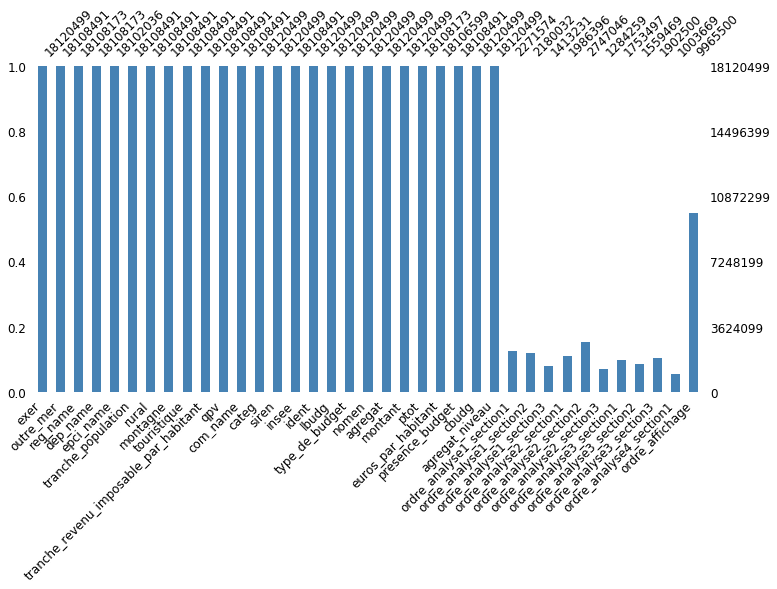

In [8]:
import missingno as msno

msno.bar(data, figsize=(12, 6), fontsize=12, color="steelblue");

A priori, the missings is not a problem, visually we can see that the ordre_analyse and ordre_affichage variables we will elimate it because we the no missing data is not enough to give us information. 
Regarding the rest of variables if we eliminate the entries would not be a problem because we speak of a 0.07% of missings data that are not going to impact in our results.
In any case, as the variable "montant" has always information, and it seems that there is a relation between most of the misings variables, we are going to see if exist a pattern that allow us to find the missings. 

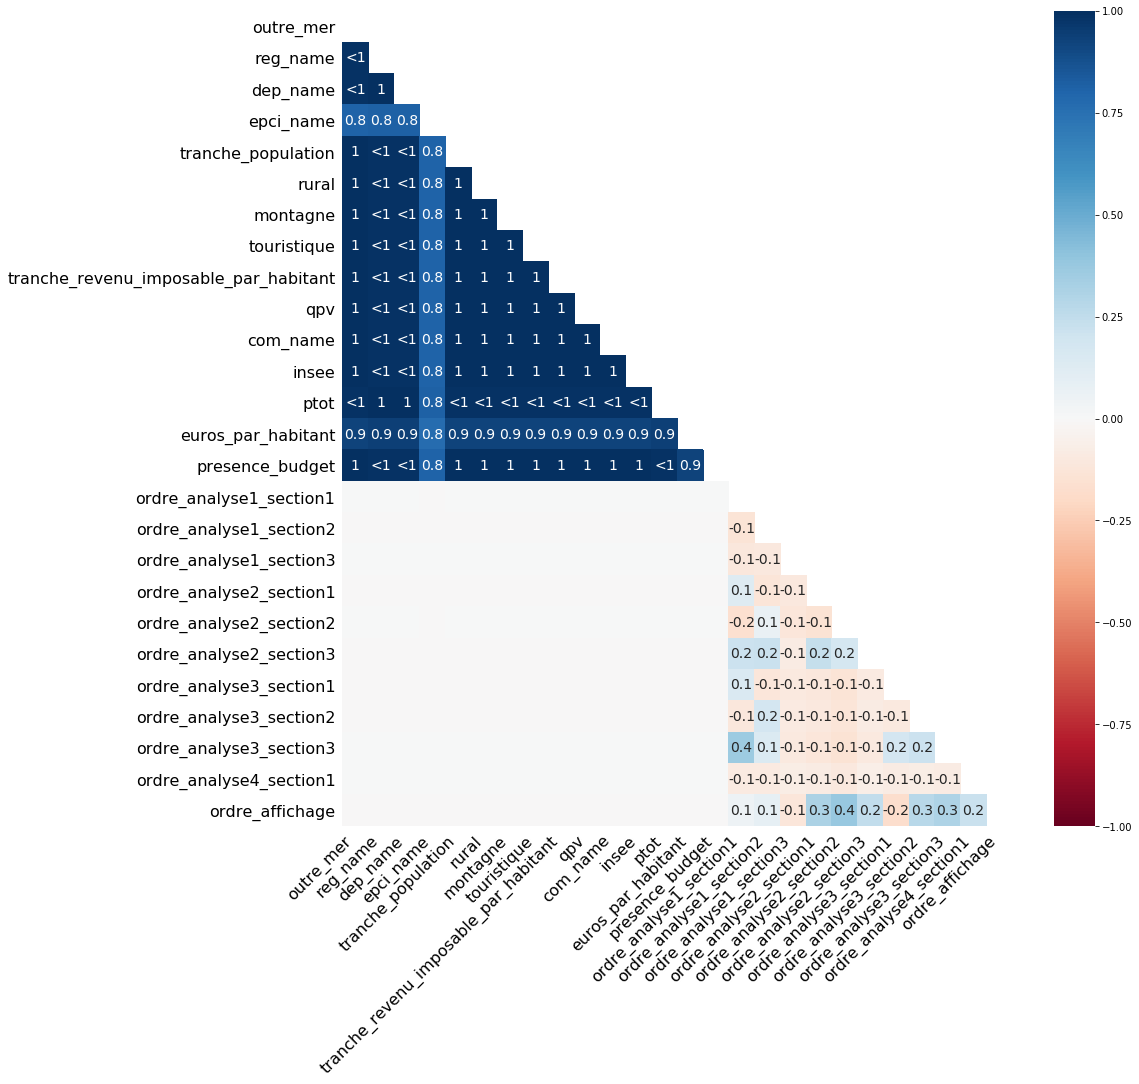

In [10]:
 msno.heatmap(data, figsize=(15, 15));

At this point we are going to eliminate the columns ordre_analyseX_sectionX

In [11]:
#data['ordre_analyse1_section1','ordre_analyse1_section2','ordre_analyse1_section3','ordre_analyse2_section1','ordre_analyse2_section2',
#'ordre_analyse2_section3','ordre_analyse3_section1','ordre_analyse3_section2','ordre_analyse3_section3','ordre_analyse4_section1',
#'ordre_affichage'].isnull().sum(axis = 0)

data =data.drop(['ordre_analyse1_section1','ordre_analyse1_section2','ordre_analyse1_section3','ordre_analyse2_section1','ordre_analyse2_section2',
'ordre_analyse2_section3','ordre_analyse3_section1','ordre_analyse3_section2','ordre_analyse3_section3','ordre_analyse4_section1',
'ordre_affichage'], axis = 1)

In [12]:
data.shape

(18120499, 26)

We have reduced the variables from 42 to 26, reducing a little bit the processing time and consequently our job.

Looking at our database we see that the field lbudg contains at the end the com_name, so we could think that with this field we could then find the dep_name, the epci_name, the reg_name and if it is outre_mer.
Hence, to go deeply and to reduce the processing time, we are going to separete the dataframe data into 2 dataframes:

 1. data_missing: With all the missings.
 2. data_no_missings: All data without missings
 
Once we end our investigation about the missings we will merge both dataframes

In [40]:
data_missing= data['outre_mer'].isnull()
data_missing = pd.DataFrame(data_missing)
om = data_missing[data_missing['outre_mer']==True]
indice = om.index
data_missing = data.iloc[indice]


In [41]:
data_index = data.index 

data_missing_index = data_missing.index

data_no_missing_index = []
for element in data_index:
    if element not in data_missing_index:
        data_no_missing_index.append(element)
        

data_no_missing = data.iloc[data_no_missing_index]

We start with our missing dataframe 

In [15]:
data_missing.head()

,exer,outre_mer,reg_name,dep_name,epci_name,tranche_population,rural,montagne,touristique,tranche_revenu_imposable_par_habitant,...,lbudg,type_de_budget,nomen,agregat,montant,ptot,euros_par_habitant,presence_budget,cbudg,agregat_niveau
2544,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BOURG-DE-THIZY,Budget principal,M14,Dépenses d'intervention,387619.81,NaN,NaN,NaN,1,4
2545,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POMPES FUNEBRES BOURG-DE-THIZY,Budget annexe,M4,Dépenses d'intervention,0.00,NaN,NaN,NaN,3,4
2575,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CHAPELLE-DE-MARDORE (LA ),Budget principal,M14,Dépenses d'intervention,8744.17,NaN,NaN,NaN,1,4
2576,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COMMERCE CAFE LA-CHAPELLE-DE-MARDORE,Budget annexe,M4,Dépenses d'intervention,0.00,NaN,NaN,NaN,3,4
2732,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MARDORE,Budget principal,M14,Dépenses d'intervention,21244.77,NaN,NaN,NaN,1,4


We can draw some important information from this dataframe. 
Firstly, we confirm that from the field lbudg we can obtain the com_name. The patterns that we have found are the followings:
- If there are only one word, this is directly the name that we were searching for, so just enough to copy from lbudg to com_name.
- When the com_name is composed it goes in almost all the cases with a dash
- When there are more than a word and the com_name is not composed the com_name is the last word.

In [42]:
import re
#r3 = re.compile(r"[^-]+$") from - ahead

# Composed names
r1 = re.compile(r"([a-zA-Z0-9.-áè]+-[a-zA-Z'.-]+)")

# One unique name or several names (we keep the last one)

r2 = re.compile(r"[^\W]+$")

for i, row in data_missing.iterrows():
    data_missing.at[i,'com_name'] = r1.findall(data_missing.at[i,'lbudg'])
for i, row in data_missing.iterrows():
    if not row['com_name']:
        data_missing.at[i,'com_name'] = r2.findall(data_missing.at[i,'lbudg'])

for i, row in data_missing.iterrows():
    if not row['com_name']:
         data_missing.at[i,'com_name'] = row['lbudg']
    
# We undo the list that is automatically done.
       
for i, row in data_missing.iterrows():
    data_missing.at[i,'com_name'] = "".join(row['com_name']) 

# We have detected that in some cases there are some words "RESTAURANT", "EAU", "ASSAT" following for a dash that are in our row and we did not want it.
#So, we will remove it.
words = ["ASST-", "RESTAURANT-", "EAU-", "LOTS-", "FORETS-", "1-", "HBS-", "SPANC-", "LOT-"]
for i, row in data_missing.iterrows():
    for word in words:
        if word in row['com_name']:
            data_missing.at[i,'com_name'] = row['com_name'].replace(word, "")
            
# Now, as in our dataframe "data" we have the column com_name in lowercase, we are going to transform it:
# For that the easiest way is to convert into lowercase and then make a title:
for i,row in data_missing.iterrows():
    data_missing.at[i,'com_name'] = row['com_name'].lower()
    data_missing.at[i,'com_name'] = row['com_name'].title()
    
# we have identified at the end of some words the articles that is necesary to eliminate ['(Le )', '(La )', '(Les)']

for i, row in data_missing.iterrows():
    if '(Le )' in row['com_name']:
        row['com_name'] = row['com_name'].replace(' (Le )', "")
        data_missing.at[i,'com_name'] = "Le" + " " +  row['com_name']
    if '(La )' in row['com_name']:
        row['com_name'] = row['com_name'].replace(' (La )', "")
        data_missing.at[i,'com_name'] = "La" + " " +  row['com_name']
    if '(Les)' in row['com_name']:
        row['com_name'] = row['com_name'].replace(' (Les)', "")
        data_missing.at[i,'com_name'] = "Les" + " " +  row['com_name']

# At this point we can look for the unique names to compare and change manually some names if it is necessary

for i, row in data_missing.iterrows():
    if "Magny" in row['com_name']:
        data_missing.at[i,'com_name'] = "Le Magny"
    if 'Chapelle-De-Mardore' in row['com_name']:
        data_missing.at[i,'com_name'] = 'La-Chapelle-De-Mardore'
    if "Bihorel" in row['com_name']:
        data_missing.at[i,'com_name'] = "Bois-Guillaume-Bihorel"
    if "Dessous" in row['com_name']:
        data_missing.at[i,'com_name'] = "Saint-Offenge-Dessous"
    if "Chedoue" in row['com_name']:
        data_missing.at[i,'com_name'] = "Fresnaye-Sur-Chedouet"


To move fordward with our analysis, ones we have found all the com_name missings, we are going to search the com_name that we have in our dataframe "data". For those com_name from "data_missing" that are in "data" we can extract the fields reg_name, dep_name, epci_name and outre_mer. 

In [20]:
com_name_missing = data_missing['com_name'].unique()

com_name_data = data['com_name'].unique()

common = []
for element in com_name_missing:
    if element in com_name_data:
        common.append(element)

common

['Thizy',
 'Vaugneray',
 'La Villeneuve',
 'Montigny',
 'Bois',
 'Le Magny',
 'Saint-Bonnet',
 'Corbon',
 'Champagne',
 'Goussainville',
 'Melay',
 'Larchamp',
 'Vrigny']

We are going to study deeply one of this communes chosen randomly:

In [21]:
Goussainville=data.loc[data['com_name']=='Goussainville']
Goussainville

,exer,outre_mer,reg_name,dep_name,epci_name,tranche_population,rural,montagne,touristique,tranche_revenu_imposable_par_habitant,...,lbudg,type_de_budget,nomen,agregat,montant,ptot,euros_par_habitant,presence_budget,cbudg,agregat_niveau
19477,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,GOUSSAINVILLE,Budget principal,M14,Dépenses d'intervention,2063634.25,31225.0,66.089167,1.0,1,4
19478,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,SERV EAU GOUSSAINVILLE,Budget annexe,M49,Dépenses d'intervention,0.00,31225.0,0.000000,1.0,3,4
19479,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,SERV ASST GOUSSAINVILLE,Budget annexe,M49,Dépenses d'intervention,0.00,31225.0,0.000000,1.0,3,4
93546,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,GOUSSAINVILLE,Budget principal,M14,Dépenses d'investissement hors remb,13992751.45,31225.0,448.126548,1.0,1,3
93547,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,SERV EAU GOUSSAINVILLE,Budget annexe,M49,Dépenses d'investissement hors remb,241583.05,31225.0,7.736847,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18019879,2015,Non,Centre-Val de Loire,Eure-et-Loir,CC du Pays Houdanais (C.C.P.H.),3.0,Oui,Non,Non,2.0,...,GOUSSAINVILLE,Budget principal,M14,Encours de dette - Dettes bancaires et assimilées,157250.44,1275.0,123.333678,1.0,1,2
18054786,2015,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,GOUSSAINVILLE,Budget principal,M14,Encours de dette - Dettes bancaires et assimilées,51351675.99,31525.0,1628.919143,1.0,1,2
18054787,2015,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,EAU - GOUSSAINVILLE,Budget annexe,M49,Encours de dette - Dettes bancaires et assimilées,235531.04,31525.0,7.471246,1.0,3,2
18075528,2015,Non,Centre-Val de Loire,Eure-et-Loir,CC du Pays Houdanais (C.C.P.H.),3.0,Oui,Non,Non,2.0,...,GOUSSAINVILLE,Budget principal,M14,Epargne de gestion,131087.36,1275.0,102.813616,1.0,1,0


We can draw from that many important conclusions.

- For the same commun, we can have different reg_name, dep_name, epci_name
- This differences depends on the siren

We need therefore the different siren, we will search then if the sirens in our data_missing are in the data dataframe.

In [25]:
data_siren = data_no_missing['siren'].unique()
missing_siren = data_missing['siren'].unique()
common_siren = []
for element in missing_siren:
    if element in data_siren:
        common_siren.append(element)

common_siren

[]

We find that we do not have any of the siren in data_missings in our dataframe data. So, we could not find by this method the missings fields.
At this point, we can not imputate the missings because we do not have the means to figure it out. 
As we have the amount in the column "montant" we are going to keep all the information that we have and that we can figure out and we are going to change the Nan for "unknown" in the following columns:

 - 'outre_mer', 'reg_name', 'dep_name', 'epci_name', 'tranche_population', 'rural', 'montagne', 'touristique','tranche_revenu_imposable_par_habitant', 'qpv', 'ptot', 'euros_par_habitant', 'presence_budget'
 
 For the column insee, as we can see in data this number

In [43]:
d = {column: "unknown" for column in ['outre_mer', 'reg_name', 'dep_name', 'epci_name',
       'tranche_population', 'rural', 'montagne', 'touristique',
       'tranche_revenu_imposable_par_habitant', 'qpv', 'ptot', 'euros_par_habitant', 'presence_budget']}
data_missing = data_missing.fillna(d)

We are left with just one variable: "insee". We are going to look into data_no_missing to verify if it follow a pattern. 

In [44]:
data['insee'] = data['siren'].apply(lambda x: str(x)[2:4]+str(x)[5:8])

Know is the turn of the the data_no_missing.
We can see that there are some data that are float and some other that are int. We are going to transform all in int

comprobar que insee se forma con las posiciones 2,3,5,6 y 7 de siren

In [32]:
data_no_missing['test'] = data['siren'].apply(lambda x: str(x)[2:4]+str(x)[5:8])
#data_no_missing['test'].equals(data_no_missing['insee'])
#data_no_missing['test'].equals(data_no_missing['insee'])
data_no_missing['Diff'] = np.where( data_no_missing['test'] == data_no_missing['insee'] , '1', '0')

C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


NameError: name 'np' is not defined

In [31]:
import numpy as np

data_no_missing.to_csv('data_no_missing.csv')
data_missing.to_csv('data_missing.csv')
df = pd.concat([data_no_missing, data_missing])
df.sort_index()
import os.path
import os
data_no_missing = os.path.join(os.sep, "Users", "crist", "mentoring", "comptes des communes","data","processed","data_no_missing.csv")
f = open(nombre_fichero, "w")
C:\Users\crist\mentoring\comptes des communes\data\processed

SyntaxError: unexpected character after line continuation character (<ipython-input-31-051f64a54ab6>, line 11)

So far, we have prepared the data and now is time to study the relation between variables and the influence of each one of them.
When we have studied the missings we have found some interensting things as we have some entries where the column "montant" that is 0. A priori, this is not as we think it should be. Why could be? we are going to try to find an explanation

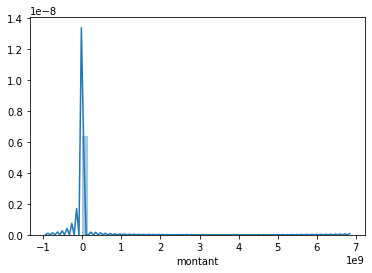

In [34]:
import seaborn as sns
sns.distplot(data_no_missing['montant']);

CORRELATION

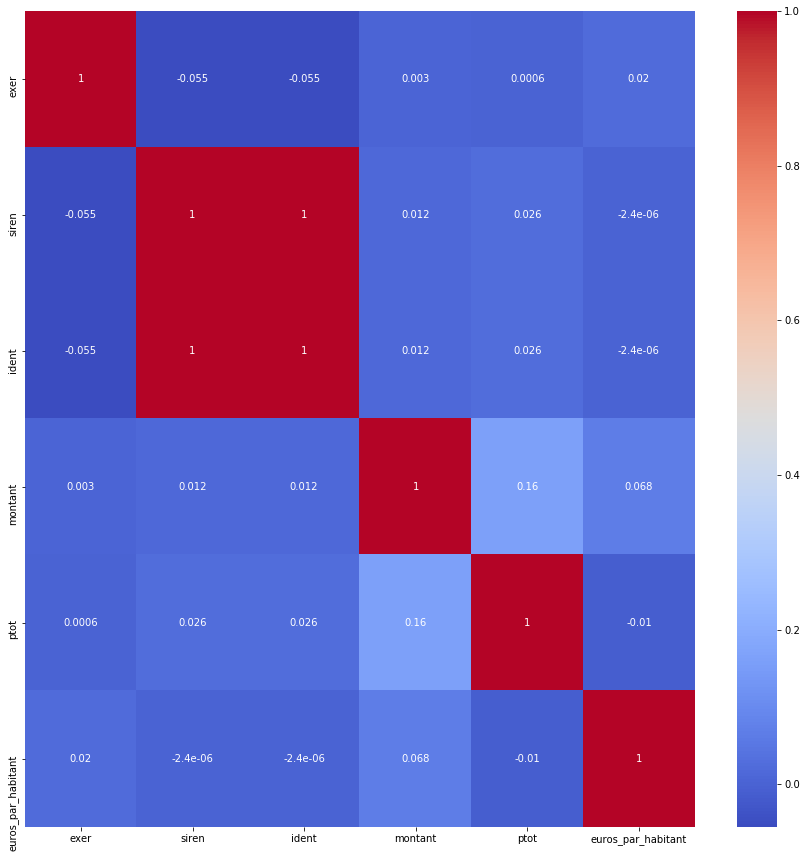

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = data_no_missing.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm");
                            

In [63]:
data_no_missing.dtypes

exer                                       int64
outre_mer                                 object
reg_name                                  object
dep_name                                  object
epci_name                                 object
tranche_population                        object
rural                                     object
montagne                                  object
touristique                               object
tranche_revenu_imposable_par_habitant     object
qpv                                       object
com_name                                  object
categ                                     object
siren                                      int64
insee                                     object
ident                                      int64
lbudg                                     object
type_de_budget                            object
nomen                                     object
agregat                                   object
montant             

In [62]:
data_no_missing[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']] = data_no_missing[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']].astype('int')
data_no_missing[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']] = data_no_missing[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']].astype('O')

By the Pearson correlation we can not extract so much information. The montant variable is not really related with the other numerical variables.

In [77]:
import ppscore as pps
power_score = pps.matrix(data_no_missing[['montant', 'ptot', 'euros_par_habitant']])

#from visualization.utils import heatmap
import seaborn as sns

table = power_score.pivot(columns="x", index="y", values="ppscore")
#sns.heatmap(table, row_labels=list(table.index), col_labels=list(table.columns));
sns.heatmap(table, annot=True, ax=ax, cmap="coolwarm");
